In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [82]:
# Load the three datasets
regression_1 = pd.read_csv('regression_1.csv')
regression_2 = pd.read_csv('regression_2.csv')
classification = pd.read_csv('classification.csv')

[0 1]


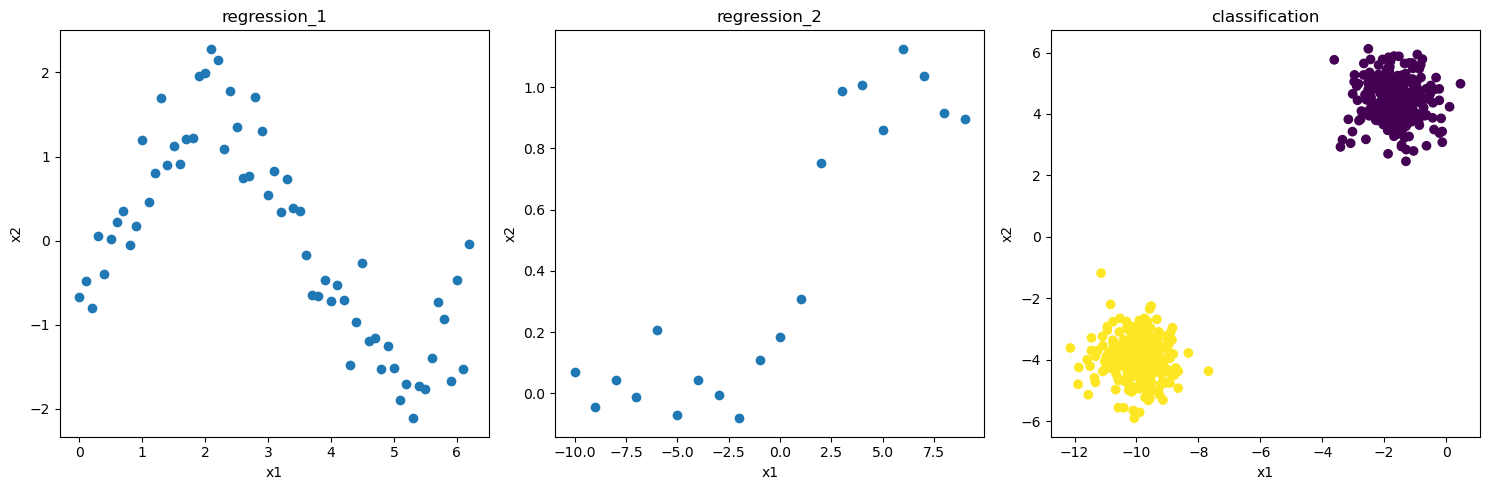

<Figure size 640x480 with 0 Axes>

In [83]:
# plot the regression_1 data
fig, ax = plt.subplots(1, 3)

# change the size of the figure
fig.set_size_inches(15, 5)

# plot regression_1, regression_2, and classification data
ax[0].scatter(regression_1['x1'], regression_1['x2'])
ax[0].set_title('regression_1')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')

ax[1].scatter(regression_2['x1'], regression_2['x2'])
ax[1].set_title('regression_2')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')

labels = classification['label']
unique_labels = np.unique(labels)
print(unique_labels)
ax[2].scatter(classification['x1'], classification['x2'], c=labels)
ax[2].set_title('classification')
ax[2].set_xlabel('x1')
ax[2].set_ylabel('x2')


plt.tight_layout()
plt.show()
plt.clf()

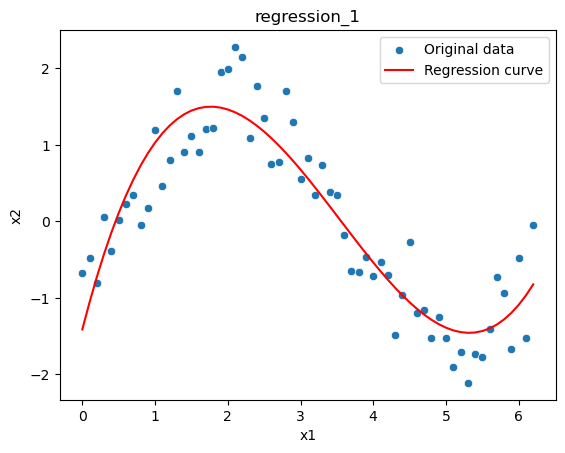

<Figure size 640x480 with 0 Axes>

In [85]:
# For the regression_1 data, fit a polynomial regression model using
# sklearn.preprocessing.PolynomialFeatures
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 3
model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
model.fit(regression_1[['x1']], regression_1['x2'])

# plot the regression_1 data and the regression curve (polynomial)
sns.scatterplot(x='x1', y='x2', data=regression_1, label="Original data")
# plotting the regression curve
plt.plot(regression_1['x1'], model.predict(regression_1[['x1']]), color='red',
         label="Regression curve")
plt.title('regression_1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

          x1        x2
x1  1.000000  0.873355
x2  0.873355  1.000000
The slope is:  [[0.06777987]]
The intercept is:  [0.45030717]


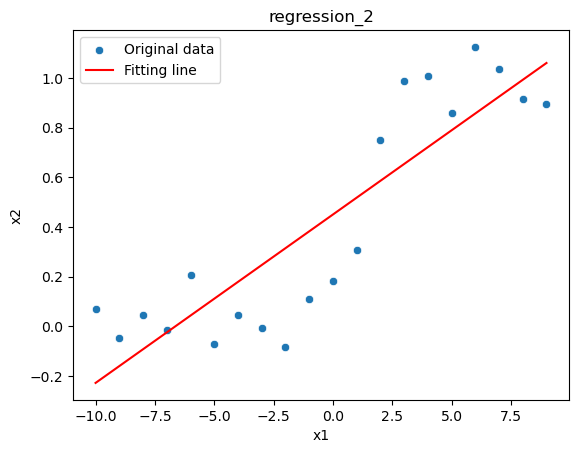

In [94]:
# Fitting a linear regression model to the regression_2 data
reg = linear_model.LinearRegression()
x1 = regression_2[['x1']]
x2 = regression_2[['x2']]
# Fitting the model
reg.fit(x1, x2)

# calaculte the slope and intercept
slope = reg.coef_
intercept = reg.intercept_

# calculate the lienar correlation coefficient between x1 and x2
corr = regression_2.corr()
print(corr)

print("The slope is: ", slope)
print("The intercept is: ", intercept)

# plot the regression_2 data and the regression line
sns.scatterplot(x='x1', y='x2', data=regression_2, label='Original data')
plt.plot(regression_2['x1'], reg.predict(regression_2[['x1']]), color='red',
         label='Fitting line')
plt.title('regression_2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()

/Users/abdallaheid/anaconda3/envs/DSSSWS2324/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


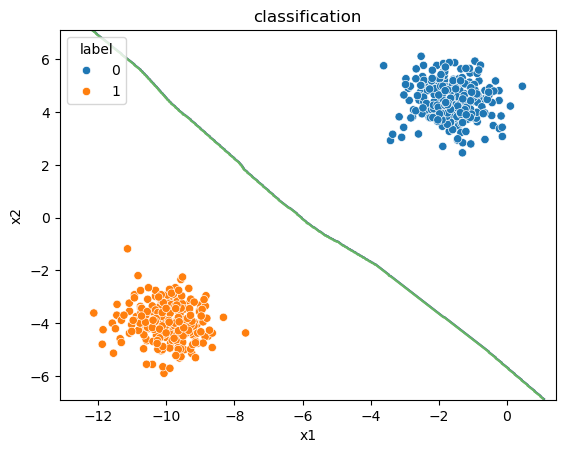

<Figure size 640x480 with 0 Axes>

In [90]:
# Fit a k-nearest neighbors model to the classification data
from sklearn.neighbors import KNeighborsClassifier

n_neighbors=3
X = classification[['x1', 'x2']]
y = classification['label']
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X, y)

# plot the classification data and the decision boundary
sns.scatterplot(x='x1', y='x2', data=classification, hue=y)
# plotting the decision boundary
x_min, x_max = classification['x1'].min() - 1, classification['x1'].max() + 1
y_min, y_max = classification['x2'].min() - 1, classification['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.4)
plt.title('classification')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()